Pada graded challenge 1 data set yang digunakan adalah dataset pokemon yang terdiri dari 721 data dengan feature nya berupa ID, name, type 1, type 2, basic types : HP, Attack, Defense, Special attack, special defense, speed.

# **DATA LOAD DAN DATA EXPLORATION**

 Berikut ini import yang digunakan untuk graded challenge 1 dan menampilkan panjang data dengan fungsi len(df)

In [ ]:
import numpy as np
import pandas as pd

#from google.colab import files 
#uploaded = files.upload()

df = pd.read_csv('Pokemon.csv')

len(df) #menampilkan panjang data

800

berikut ini fungsi untuk menampilkan row dan coloumn dataset

In [ ]:
df.shape

(800, 13)

berikut ini melakukan eksplorasi data sederhana dengan menampilkan 5 data pertama pada data set menggunakan fungsi df.head()

In [ ]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


berikut ini melakukan eksplorasi data sederhana dengan menampilkan 5 data terakhir pada data set menggunakan fungsi df.tail()

In [ ]:
df.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


berikut ini melakukan eksplorasi data sederhana dengan menampilkan informasi terkait data set dengan fungsi df.info()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


# **MISSING VALUE**

berikut ini mengecek apakah ada missing value pada data set tersebut atau tidak



In [ ]:
df.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

karena terdapat missing value sebanyak 386 data pada kolom type 2 maka langkah selanjutnya adalah mengisi missing value tersebut dengan metode mencari nilai modus data pada kolom type 2 dengan melakukan grouping 

In [ ]:
df.groupby("Type 2", sort = True).sum()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 2,,,,,,,,,,
Bug,1146,1180,160,270,240,140,185,185,10,0
Dark,8277,9688,1511,2196,1441,1636,1397,1507,75,1
Dragon,8686,9471,1479,1700,1567,1773,1502,1450,75,4
Electric,2794,2732,529,436,410,487,441,429,24,1
Fairy,8718,9613,1479,1417,1699,1725,1885,1408,82,2
Fighting,11393,13672,2066,2934,2145,2113,2142,2272,102,4
Fire,5782,6075,855,975,962,1325,1002,956,48,3
Flying,32117,43897,6925,7788,6626,7336,6907,8315,298,13
Ghost,7724,6030,828,1178,1152,1025,1093,754,67,1


setelah dilakukan grouping ditemukan nilai modusnya yaitu "Flying" sehingga data data yang hilang di replace dengan value "Flying" agar kolom type 2 terisi semua dengan menggunakan fungsi berikut ini

In [ ]:
df['Type 2'].fillna('Flying', inplace = True)

setelah dilakukan replacing value "flying" kemudian data set tersebut dicek kembali untuk memastikan tidak ada missing value 

In [ ]:
df.isna().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

kemudian data set tersebut di cek kembali dengan menggunakan fungsi df.head() untuk memastikan apakah data yang missing tadi sudah terisi dengan value "flying"

In [ ]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Flying,309,39,52,43,60,50,65,1,False


setelah dipastikan data sudah terisi langkah selanjutnya melakukan rename pada nama kolom

# **RENAMED DAN DELETE COLUMN**

kali ini nama kolom type 1 dan type 2 akan diubah namanya menjadi power 1 dan power 2 dengan menggunakan fungsi dibawah ini

In [ ]:
pokemon = df.copy() #mengubah nama dataframe menjadi pokemon

In [ ]:
pokemon.shape #mengecek baris dan kolom pada dataframe pokemon

(800, 13)

In [ ]:
renamed_pokemon = pokemon.rename(
    columns ={"Type 1" : "Power 1", "Type 2" : "Power 2"}
)
renamed_pokemon.head()

,#,Name,Power 1,Power 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Flying,309,39,52,43,60,50,65,1,False


setelah melakukan rename pada kolom type 1 dan type 2 selanjutnya akan dilakukan penghapusan salah satu kolom, kali ini yang akan dihapus adalah kolom legendary dengan menggunakan fungsi sebagai berikut

In [ ]:
legendary_column =['Legendary']
pokemon.drop(legendary_column, inplace=True, axis=1)

setelah dilakukan penghapusan selanjutnya dilakukan pengecekan untuk memastikan apakah kolom legendary sudah terhapus atau belum 

In [ ]:
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1
4,4,Charmander,Fire,Flying,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6


pada hasil kode di atas sudah terlihat bahwa kolom legendary telah berhasil dihapus dan kolom nya juga sudah berkurang dari 13 kolom menjadi 12 kolom

# **GROUPING**

Kali ini akan dilakukan grouping pada kolom dari dataframe dengan menggunakan fungsi berikut

In [ ]:
df.groupby("Name", sort = True) ["Generation"].sum() #membuat groupping berdasarkan nama untuk mengetahui generation

Name
Abomasnow                  4
AbomasnowMega Abomasnow    4
Abra                       1
Absol                      3
AbsolMega Absol            3
                          ..
Zoroark                    5
Zorua                      5
Zubat                      1
Zweilous                   5
Zygarde50% Forme           6
Name: Generation, Length: 800, dtype: int64

In [ ]:
df.groupby("Name", sort = False) ["Type 1"].sum() #membuat groupping berdasarkan nama untuk mengetahui Type 1

Name
Bulbasaur                  Grass
Ivysaur                    Grass
Venusaur                   Grass
VenusaurMega Venusaur      Grass
Charmander                  Fire
                          ...   
Diancie                     Rock
DiancieMega Diancie         Rock
HoopaHoopa Confined      Psychic
HoopaHoopa Unbound       Psychic
Volcanion                   Fire
Name: Type 1, Length: 800, dtype: object

In [ ]:
df.groupby("Name", sort = True) ["HP"].sum() #membuat groupping berdasarkan nama untuk mengetahui jumlah HP 

Name
Abomasnow                   90
AbomasnowMega Abomasnow     90
Abra                        25
Absol                       65
AbsolMega Absol             65
                          ... 
Zoroark                     60
Zorua                       40
Zubat                       40
Zweilous                    72
Zygarde50% Forme           108
Name: HP, Length: 800, dtype: int64

# **QUERYING DENGAN PANDAS**

Kali ini akan dicoba melakukan sebuah query untuk mencari data pada dataframe dengan menggunakan pandas

In [ ]:
pokemon[                                    #query ini mencari data di pokemon dengan ketentuan type 1 grass 
        (pokemon["Type 1"] == 'Grass') &    #yang memiliki nilai total di atas 400 dan nilai hp di bawah 80
        (pokemon["Total"] > 400) &
        (pokemon["HP"] < 80)
]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1
50,45,Vileplume,Grass,Poison,490,75,80,85,110,90,50,1
122,114,Tangela,Grass,Flying,435,65,55,115,100,40,60,1
167,153,Bayleef,Grass,Flying,405,60,62,80,63,80,60,2
197,182,Bellossom,Grass,Flying,490,75,80,95,90,100,50,2
204,189,Jumpluff,Grass,Flying,460,75,55,70,55,95,110,2
207,192,Sunflora,Grass,Flying,425,75,75,55,105,85,30,2
273,253,Grovyle,Grass,Flying,405,50,65,45,85,65,95,3
274,254,Sceptile,Grass,Flying,530,70,85,65,105,85,120,3
275,254,SceptileMega Sceptile,Grass,Dragon,630,70,110,75,145,85,145,3


In [ ]:
pokemon[                            #query ini mencari data di pokemon dengan ketentuan yang memiliki nilai HP = 75
        (pokemon["HP"] == 75) &     #dan attack di bawah 400
        (pokemon["Attack"] < 400)
]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
33,28,Sandslash,Ground,Flying,450,75,100,110,45,55,65,1
47,42,Golbat,Poison,Flying,455,75,80,70,65,75,90,1
50,45,Vileplume,Grass,Poison,490,75,80,85,110,90,50,1
138,128,Tauros,Normal,Flying,490,75,100,95,40,70,110,1
184,170,Chinchou,Water,Electric,330,75,38,38,56,56,67,2
197,182,Bellossom,Grass,Flying,490,75,80,95,90,100,50,2
204,189,Jumpluff,Grass,Flying,460,75,55,70,55,95,110,2
207,192,Sunflora,Grass,Flying,425,75,75,55,105,85,30,2
220,205,Forretress,Bug,Steel,465,75,90,140,60,60,40,2
223,208,Steelix,Steel,Ground,510,75,85,200,55,65,30,2


In [ ]:
pokemon[                                #query ini mencari data di pokemon dengan ketentuan type 1 dark dengan total lebih besar atau sama dengan 500
        (pokemon["Type 1"] == 'Dark') &
        (pokemon["Total"] >= 500)
]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
212,197,Umbreon,Dark,Flying,525,95,65,110,60,130,65,2
247,229,Houndoom,Dark,Fire,500,75,90,50,110,80,95,2
248,229,HoundoomMega Houndoom,Dark,Fire,600,75,90,90,140,90,115,2
393,359,AbsolMega Absol,Dark,Flying,565,65,150,60,115,60,115,3
478,430,Honchkrow,Dark,Flying,505,100,125,52,105,52,71,4
512,461,Weavile,Dark,Ice,510,70,120,65,45,85,125,4
549,491,Darkrai,Dark,Flying,600,70,90,90,135,90,125,4
632,571,Zoroark,Dark,Flying,510,60,105,60,120,60,105,5
691,630,Mandibuzz,Dark,Flying,510,110,65,105,55,95,80,5
696,635,Hydreigon,Dark,Dragon,600,92,105,90,125,90,98,5


# **PANDAS VISUALIZATION**

Berikut ini menampilkan visualisasi dari data pokemon

In [ ]:
%matplotlib inline
data = pokemon

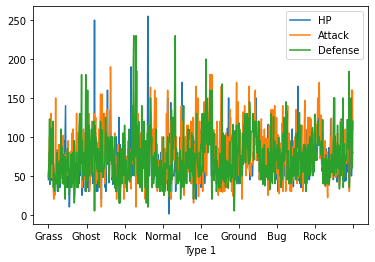

In [ ]:
df.plot(x="Type 1", y=["HP", "Attack","Defense"])